# Análisis Exploratorio 

En este análisis, exploraremos la serie temporal de los precios de Bitcoin (BTC) contra el dólar estadounidense (USD) correspondiente a los meses de septiembre y octubre de 2014. Nos enfocaremos en:

- **Modelado y Análisis**: Aplicaremos métodos estadísticos para modelar y analizar los datos, identificando patrones y tendencias.
- **Visualización de Datos**: Utilizaremos gráficos para visualizar la evolución de los precios y sus fluctuaciones.
- **Preparación para la Predicción**: Ajustaremos y transformaremos los datos para mejorar la precisión de los modelos predictivos futuros.

Este estudio nos permitirá comprender las dinámicas del precio de Bitcoin durante el periodo seleccionado y prepararnos para hacer proyecciones sobre su comportamiento futuro.

# Diferentes Tipos de Datos

Los analistas que estudian las fluctuaciones del Bitcoin contra el dólar estadounidense (BTC-USD) se encuentran principalmente con datos de series temporales. Estos datos son vitales para:

- **Modelar la Dinámica de Precios**: Aplicación de modelos estadísticos para capturar patrones y tendencias.
- **Análisis Predictivo**: Utilización de los datos históricos para predecir futuros movimientos de precios.
- **Evaluación de Volatilidad y Riesgo**: Análisis del comportamiento del precio en diferentes intervalos para gestionar el riesgo y la exposición.

Comprender y procesar correctamente estos datos es fundamental para desarrollar estrategias de trading efectivas y para la toma de decisiones informadas en el mercado de criptomonedas.

# Datos Transversales 

Los datos transversales o de corte transversal para el análisis de BTC-USD implican tomar observaciones de múltiples precios del Bitcoin frente al dólar estadounidense en un mismo momento específico. Estos datos pueden provenir de diferentes plataformas de intercambio al mismo tiempo, pero considerados en un único punto temporal, como al cierre de un día en particular.

<div style="border-left: 5px solid #4CAF50; background-color: #f4f4f4; padding: 10px; margin-top: 20px; margin-bottom: 20px;">
    <strong>Observación</strong>
    <ul>
        <li>En esencia, los datos transversales representan un <strong>instante o momento dado</strong>. Sin embargo, los datos de clientes para el <em>análisis de rotación</em> pueden obtenerse a lo largo de un periodo de tiempo, como años y meses. Pero, a efectos de análisis, el tiempo puede no desempeñar un <strong>papel importante</strong>, y por lo tanto, aunque los datos de rotación de clientes pueden obtenerse de múltiples puntos en el tiempo, pueden seguir considerándose como un conjunto de datos transversal.</li>
    </ul>
</div>

Este enfoque de datos transversales es especialmente útil para análisis que requieren una instantánea del mercado para tomar decisiones rápidas de inversión o para estudios comparativos en diferentes condiciones de mercado en el mismo momento.



In [185]:

import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf as Autocorrelation, plot_pacf as ParcialAutocorrelation
from statsmodels.tsa.stattools import adfuller as A_DickeyFuller
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from arch import arch_model
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera, skew, kurtosis
import itertools
btc_data = yf.download('BTC-USD', start='2017-11-09', end='2023-05-07',progress=False)
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


* El código verifica la presencia de valores faltantes en el conjunto de datos `btc_data`, relacionado con los precios del Bitcoin. Utiliza funciones para identificar y contar valores nulos en cada columna, confirmando que no existen datos ausentes. Esto garantiza la integridad de los datos para análisis futuros, asegurando que los resultados serán precisos y confiables.

In [186]:
missing_data = btc_data.isnull().sum()
print(missing_data)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


* Ahora tenemos dos visualizaciones gráficas que ayudan en el análisis de los precios del Bitcoin. La primera es un gráfico de velas, que detalla los precios de apertura, cierre, máximo y mínimo diarios del Bitcoin, proporcionando una clara visión de la volatilidad y las tendencias del mercado en un período específico. 
* La segunda visualización es un histograma que muestra el volumen negociado diariamente, lo que permite observar la actividad del mercado y explorar posibles correlaciones entre el volumen de transacciones y los movimientos de precios. Estas visualizaciones son herramientas esenciales para comprender mejor el comportamiento del mercado de criptomonedas.

%%HTML
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js"></script>

In [187]:
fig_candlestick = go.Figure(data=[go.Candlestick(x=btc_data.index,
                                                  open=btc_data['Open'],
                                                  high=btc_data['High'],
                                                  low=btc_data['Low'],
                                                  close=btc_data['Close'])])

fig_candlestick.update_layout(title='Gráfico de Velas del BTC-USD',
                              xaxis_title='Fecha',
                              yaxis_title='Precio',
                              xaxis_rangeslider_visible=False)

fig_histogram = px.histogram(btc_data, x=btc_data.index, y='Volume',
                             title='Histograma del Volumen Tradeado Diariamente (BTC-USD)',
                             labels={'x':'Fecha', 'Volume':'Volumen'})
fig_candlestick.show()
fig_histogram.show()



# Interpretación del Gráfico de Velas y el Histograma del Volumen Tradeado Diariamente (BTC-USD)
Gráfico de Velas del BTC-USD

**Eje Y (Precio):**
* Muestra el rango de precios del BTC-USD.
Los precios varían significativamente, mostrando tanto picos como valles importantes.

**Eje X (Fecha):**
* Representa el tiempo desde 2018 hasta 2023.
Cada "vela" en el gráfico representa el rango de precios en un periodo de tiempo específico (probablemente un día o una semana).

**Velas:**
* Cada vela tiene un cuerpo que representa la diferencia entre el precio de apertura y cierre.
Las "mechas" o "sombras" indican los precios más altos y más bajos durante el periodo.
Las velas verdes indican que el precio de cierre fue mayor que el de apertura, mientras que las velas rojas indican lo contrario.

**Conclusiones del Gráfico de Velas**
* Tendencias:

Se observan tendencias claras de aumento y disminución en los precios de BTC-USD. Por ejemplo, hubo un pico significativo a finales de 2017 y otro alrededor de principios de 2021.

* Volatilidad:
Las variaciones en el tamaño de las velas indican períodos de alta y baja volatilidad. Picos abruptos en los precios y mechas largas sugieren alta volatilidad.

* Patrones:
Se pueden observar patrones de velas específicos que indican cambios en las tendencias, como doji (indicador de indecisión) o martillo (posible reversión de tendencia).

**Histograma del Volumen Tradeado Diariamente (BTC-USD)**

* Eje Y (Logaritmo del Volumen):

* Muestra el volumen de BTC tradeado, en una escala logarítmica para manejar la amplia variación en los datos.
Eje X (Fecha):

* Representa el tiempo desde 2018 hasta 2023.
Cada barra en el histograma representa el volumen de BTC tradeado en un periodo de tiempo específico (probablemente un día).

**Conclusiones del Histograma de Volumen**
* Volumen Tradeado:

* El volumen tradeado muestra fluctuaciones significativas, con períodos de alto y bajo volumen.
Hubo un aumento notable en el volumen tradeado en momentos de picos de precios, como en 2018 y 2021, lo que indica mayor actividad de trading durante estos períodos.
* Relación con Precios:

* El volumen tradeado parece correlacionarse con los picos y valles del gráfico de velas. A menudo, el volumen aumenta durante los movimientos de precios significativos.

Ahora presentamos un código que realiza un análisis de los precios del Bitcoin en relación con el dólar estadounidense, estructurando la información de manera temporal para observar tendencias a largo plazo. A través de la agrupación de datos en intervalos semanales, mensuales y anuales, se calcula el precio medio del Bitcoin, permitiendo una evaluación clara de su comportamiento a lo largo del tiempo. Posteriormente, se generan gráficos lineales para visualizar estas tendencias. Este enfoque simplificado facilita la comprensión de la evolución del valor del Bitcoin, siendo una herramienta valiosa para informar decisiones financieras o de inversión.

In [188]:
btc_weekly = btc_data.resample('W').mean()
btc_monthly = btc_data.resample('M').mean()
btc_yearly = btc_data.resample('Y').mean()

fig_weekly = px.line(btc_weekly, x=btc_weekly.index, y='Close',
                     title='Serie de Tiempo Semanal (BTC-USD)',
                     labels={'x':'Fecha', 'Close':'Precio de Cierre'})

fig_monthly = px.line(btc_monthly, x=btc_monthly.index, y='Close',
                      title='Serie de Tiempo Mensual (BTC-USD)',
                      labels={'x':'Fecha', 'Close':'Precio de Cierre'})

fig_yearly = px.line(btc_yearly, x=btc_yearly.index, y='Close',
                     title='Serie de Tiempo Anual (BTC-USD)',
                     labels={'x':'Fecha', 'Close':'Precio de Cierre'})
fig_weekly.show()
fig_monthly.show()
fig_yearly.show()

C:\Users\JUAN JOSE\AppData\Local\Temp\ipykernel_9900\1305164593.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\JUAN JOSE\AppData\Local\Temp\ipykernel_9900\1305164593.py:3: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



**Interpretación de las Series de Tiempo Semanal y Mensual del Precio de Cierre (BTC-USD)**
Serie de Tiempo Semanal del Precio de Cierre (BTC-USD)
* Eje Y (Precio de Cierre):

**Muestra el rango de precios de cierre del BTC-USD.** 
Los precios varían desde aproximadamente  0en2018hastamásde 60,000 en los picos.

**Eje X (Fecha):**
* Representa el tiempo desde 2018 hasta 2023.
* Observaciones:

La serie de tiempo muestra los precios de cierre semanales del BTC-USD.
Se pueden identificar varias fases de crecimiento y decrecimiento en el precio del BTC a lo largo de los años.

**Conclusiones de la Serie de Tiempo Semanal**
* Tendencias Generales:

Hay una tendencia alcista significativa desde finales de 2020 hasta principios de 2021, con picos notables en los precios.
Después del pico, hay una corrección y una cierta estabilización en los precios, aunque con alta volatilidad.

* Volatilidad:

La serie muestra períodos de alta volatilidad, especialmente durante los picos en 2017 y 2021.
Los precios parecen estabilizarse hacia el final del período, aunque siguen siendo volátiles.

**Serie de Tiempo Mensual del Precio de Cierre (BTC-USD)**
* Eje Y (Precio de Cierre):

Similar al gráfico semanal, muestra el rango de precios de cierre del BTC-USD.
* Eje X (Fecha):

**Representa el tiempo desde 2018 hasta 2023.**
* Observaciones:

La serie de tiempo muestra los precios de cierre mensuales del BTC-USD.
Se pueden identificar tendencias de crecimiento y decrecimiento más suavizadas en comparación con la serie semanal.

**Conclusiones de la Serie de Tiempo Mensual**
* Tendencias Generales:

La tendencia alcista es más clara en la vista mensual, mostrando un crecimiento sostenido a lo largo de 2020 hasta alcanzar un máximo en 2021.
Después del pico, hay una corrección significativa y una posterior estabilización.
* Volatilidad:

Aunque la volatilidad sigue presente, la vista mensual suaviza algunas de las fluctuaciones más extremas vistas en la serie semanal.
La serie mensual proporciona una mejor visión de las tendencias a largo plazo.

Presentamos el siguiente  código que analiza la distribución de los precios de cierre del Bitcoin a través de diagramas de caja que organizan los datos por semana, mes y año. Estos boxplots muestran la mediana, cuartiles y valores atípicos, ayudando a visualizar la variabilidad y las tendencias del precio del Bitcoin en diferentes periodos. Este enfoque proporciona una visión clara y concisa de las fluctuaciones del mercado de Bitcoin a lo largo del tiempo.

In [189]:
btc_data['Week'] = btc_data.index.to_series().dt.isocalendar().week
btc_data['Month'] = btc_data.index.to_series().dt.month
btc_data['Year'] = btc_data.index.to_series().dt.year

fig_weekly_box = px.box(btc_data, x='Week', y='Close',
                        title='Boxplot Semanal del Precio de Cierre (BTC-USD)',
                        labels={'Week':'Semana', 'Close':'Precio de Cierre'})

fig_monthly_box = px.box(btc_data, x='Month', y='Close',
                         title='Boxplot Mensual del Precio de Cierre (BTC-USD)',
                         labels={'Month':'Mes', 'Close':'Precio de Cierre'})

fig_yearly_box = px.box(btc_data, x='Year', y='Close',
                        title='Boxplot Anual del Precio de Cierre (BTC-USD)',
                        labels={'Year':'Año', 'Close':'Precio de Cierre'})

fig_weekly_box.show()
fig_monthly_box.show()
fig_yearly_box.show()

**Interpretación de los Boxplots del Precio de Cierre Semanal y Mensual de BTC-USD**
**Boxplot Semanal del Precio de Cierre (BTC-USD)**
**Eje Y (Precio de Cierre):**
* Muestra el rango de precios de cierre del BTC-USD.
* Los precios varían de aproximadamente 10,000acasi70,000.

**Eje X (Semana):**
* Representa las semanas del año.
Cada caja en el boxplot representa la distribución de los precios de cierre en una semana específica.

**Observaciones:**
* Las cajas (boxplots) representan la mediana y el rango intercuartílico (IQR) de los precios de cierre para cada semana.
Las líneas que se extienden desde las cajas (bigotes) indican los rangos de los precios que no son considerados outliers.
Los puntos fuera de los bigotes representan outliers, indicando precios que son inusualmente altos o bajos para esa semana.

**Conclusiones del Boxplot Semanal**
* Mediana y Rango:

La mediana de los precios de cierre fluctúa a lo largo de las semanas.
Se observa una disminución en la dispersión de los precios a medida que avanzan las semanas, especialmente después de la semana 30, lo que indica una menor volatilidad en la segunda mitad del año.

* Outliers:

Hay varios outliers en diferentes semanas, sugiriendo que en ciertas semanas hubo precios de cierre excepcionalmente altos o bajos.

* Volatilidad:

Las primeras semanas muestran una mayor variabilidad en los precios, con rangos más amplios y más outliers, lo que sugiere una mayor volatilidad al principio del año.

**Boxplot Mensual del Precio de Cierre (BTC-USD)**
* Eje Y (Precio de Cierre):
Similar al boxplot semanal, muestra el rango de precios de cierre del BTC-USD.

**Eje X (Mes):**

* Representa los meses del año.
* Cada caja en el boxplot representa la distribución de los precios de cierre en un mes específico.

**Observaciones:**
Las cajas representan la mediana y el rango intercuartílico (IQR) de los precios de cierre para cada mes.
Los bigotes indican los rangos de los precios que no son considerados outliers.
Los puntos fuera de los bigotes representan outliers, indicando precios que son inusualmente altos o bajos para ese mes.
Conclusiones del Boxplot Mensual

* Mediana y Rango:

La mediana de los precios de cierre varía de mes a mes.
Los meses de abril a junio parecen tener las cajas más altas, indicando un aumento en los precios de cierre durante estos meses.

* Outliers:

Hay varios outliers en ciertos meses, particularmente en octubre y diciembre, sugiriendo precios excepcionalmente altos o bajos durante esos meses.
* Volatilidad:

La variabilidad de los precios es mayor en algunos meses como abril, junio, y diciembre, lo que indica una mayor volatilidad en esos períodos.

**Resumen General**

* Patrones Semanales y Mensuales:

* Los precios de cierre de BTC-USD muestran fluctuaciones y volatilidad a lo largo del año, con períodos específicos de alta y baja volatilidad.

* La segunda mitad del año parece mostrar menos volatilidad semanal en comparación con la primera mitad.

Mensualmente, ciertos meses muestran una mayor dispersión y volatilidad en los precios de cierre.
* Outliers y Volatilidad:

* La presencia de outliers en varios puntos del año sugiere eventos o condiciones de mercado que causaron movimientos de precios inusuales.
La observación de estas fluctuaciones puede ser útil para desarrollar estrategias de inversión o para entender mejor los comportamientos del mercado en diferentes períodos.

El siguinte código realiza un análisis estadístico de los precios de cierre del Bitcoin (BTC) en dólares estadounidenses (USD) para determinar la autocorrelación y estacionariedad de la serie temporal. Primero, genera un gráfico de autocorrelación para visualizar cómo los precios anteriores influyen en los futuros a lo largo de 250 retrasos. Luego, utiliza el test de Dickey-Fuller aumentado (ADF) y el test de Ljung-Box para evaluar la hipótesis de que los precios siguen una raíz unitaria y la independencia en las correlaciones respectivamente, reportando las estadísticas relevantes y los valores-p para determinar la significancia de los resultados. Estos tests son cruciales para comprender la predictibilidad y las dinámicas temporales del precio del Bitcoin.

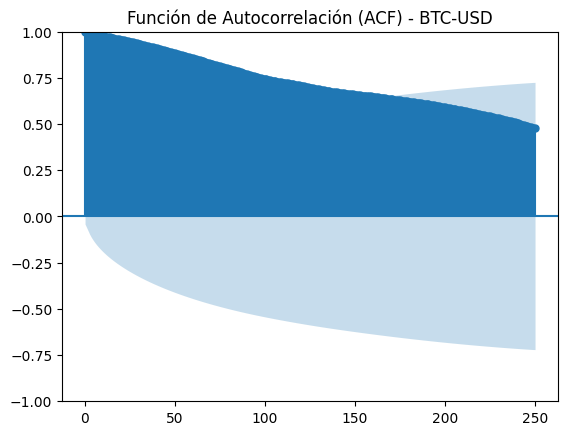

ADF Statistic: -1.428099856554084
p-value: 0.5687330426160887
LB Statistic: 19661.732515282347
p-value: 0.0


In [190]:
close_prices = btc_data['Close']

Autocorrelation(close_prices, lags=250)
plt.title('Función de Autocorrelación (ACF) - BTC-USD')
plt.show()

adf_result = A_DickeyFuller(close_prices)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ljungbox_result = acorr_ljungbox(close_prices, lags=[10])
print(f'LB Statistic: {ljungbox_result["lb_stat"].values[0]}')
print(f'p-value: {ljungbox_result["lb_pvalue"].values[0]}')

# Interpretación de la Función de Autocorrelación (ACF)
* Gráfico de ACF
**Eje Y (Autocorrelación):**
* Muestra los valores de la autocorrelación para diferentes rezagos (lags). Los valores van de -1 a 1.
* Valores positivos indican que las observaciones en ese rezago están positivamente correlacionadas.
* Valores negativos indican que las observaciones en ese rezago están negativamente correlacionadas.

**Eje X (Lags):**

* Muestra los diferentes rezagos, que en este caso parecen ir hasta aproximadamente 250.

**Sombreado Azul Claro (Intervalo de Confianza):**
* Muestra el intervalo de confianza alrededor de las autocorrelaciones. Si una barra de autocorrelación cae fuera de esta región, es significativamente diferente de cero.
* Generalmente, se utiliza un intervalo de confianza del 95%.

**Barras de Autocorrelación:**

* Las barras indican la autocorrelación en cada rezago.
* En este gráfico, se observa que las autocorrelaciones son altas y positivas en los primeros rezagos y luego disminuyen gradualmente pero se mantienen dentro del intervalo de confianza, indicando una fuerte correlación a corto plazo que se desvanece lentamente a medida que el rezago aumenta.
**Estadísticas**
* ADF Statistic (Prueba de Dickey-Fuller Aumentada):
* Estadístico ADF: -1.428999565548828
* P-valor: 0.5687380426160893
* La prueba ADF se utiliza para verificar la estacionariedad de la serie temporal. Un p-valor mayor a 0.05 sugiere que no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, es decir, la serie no es estacionaria.

**LB Statistic (Prueba de Ljung-Box):**

* LB Statistic: 19661.73215282347
* P-valor: 0.0
* La prueba de Ljung-Box evalúa si hay autocorrelaciones en una serie de tiempo. Un p-valor muy pequeño (0.0) indica que hay autocorrelaciones significativas en la serie, sugiriendo que la serie no es independiente.

**Conclusión**
* Serie No Estacionaria:

* El alto p-valor de la prueba ADF indica que la serie BTC-USD no es estacionaria. Esto significa que las propiedades estadísticas de la serie, como la media y la varianza, cambian con el tiempo.
**Autocorrelaciones Significativas:**

* Las barras de autocorrelación muestran que hay una fuerte correlación a corto plazo en la serie, que se desvanece lentamente.
El resultado de la prueba de Ljung-Box confirma que hay autocorrelaciones significativas en la serie.

El siguiente código analiza la serie temporal de los precios de cierre del Bitcoin, aplicando primero una transformación logarítmica para mejorar las propiedades estadísticas de los datos. Posteriormente, se traza la función de autocorrelación (ACF) para evaluar la dependencia entre precios en 400 retrasos. También se realizan pruebas de Dickey-Fuller aumentado (ADF) y Ljung-Box para verificar la estacionariedad de la serie y la independencia de las autocorrelaciones, respectivamente, proporcionando estadísticas clave y valores-p para evaluar estas propiedades.

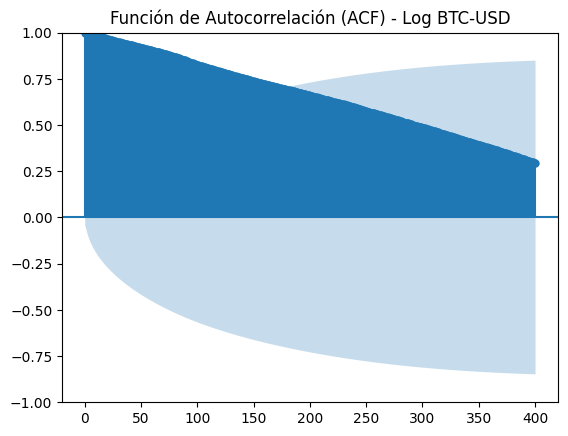

ADF Statistic (Log): -1.2177466424180592
p-value (Log): 0.6659153459050978
LB Statistic (Log): 19752.484666033008
p-value (Log): 0.0


In [191]:
log_close_prices = np.log(close_prices)

Autocorrelation(log_close_prices, lags=400)
plt.title('Función de Autocorrelación (ACF) - Log BTC-USD')
plt.show()

adf_result_log = A_DickeyFuller(log_close_prices)
print(f'ADF Statistic (Log): {adf_result_log[0]}')
print(f'p-value (Log): {adf_result_log[1]}')

ljungbox_result_log = acorr_ljungbox(log_close_prices, lags=[10])
print(f'LB Statistic (Log): {ljungbox_result_log["lb_stat"].values[0]}')
print(f'p-value (Log): {ljungbox_result_log["lb_pvalue"].values[0]}')

# Interpretación de la Función de Autocorrelación (ACF) del Logaritmo de BTC-USD
* Gráfico de ACF
**Eje Y (Autocorrelación):**

* Muestra los valores de la autocorrelación para diferentes rezagos (lags). Los valores van de -1 a 1.
* Valores positivos indican que las observaciones en ese rezago están positivamente correlacionadas.
* Valores negativos indican que las observaciones en ese rezago están negativamente correlacionadas.

**Eje X (Lags):**
* Muestra los diferentes rezagos, que en este caso llegan hasta 400.

**Sombreado Azul Claro (Intervalo de Confianza):**
* Muestra el intervalo de confianza alrededor de las autocorrelaciones. Si una barra de autocorrelación cae fuera de esta región, es significativamente diferente de cero.
* Generalmente, se utiliza un intervalo de confianza del 95%.

**Barras de Autocorrelación:**

* Las barras indican la autocorrelación en cada rezago.
* En este gráfico, se observa que las autocorrelaciones son altas y positivas en los primeros rezagos y luego disminuyen gradualmente pero se mantienen dentro del intervalo de confianza, indicando una fuerte correlación a corto plazo que se desvanece lentamente a medida que el rezago aumenta.

**Estadísticas**
* ADF Statistic (Prueba de Dickey-Fuller Aumentada):

* Estadístico ADF: -1.2177466424188352
* P-valor: 0.6695135459951604
* Un p-valor mayor a 0.05 sugiere que no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, es decir, la serie no es estacionaria.

**LB Statistic (Prueba de Ljung-Box):**

* LB Statistic: 19752.484666336088
* P-valor: 0.0
* Un p-valor muy pequeño (0.0) indica que hay autocorrelaciones significativas en la serie, sugiriendo que la serie no es independiente.

**Conclusión**
* Serie No Estacionaria:

* El alto p-valor de la prueba ADF indica que la serie de log-precios de BTC-USD no es estacionaria. Esto significa que las propiedades estadísticas de la serie, como la media y la varianza, cambian con el tiempo.

**Autocorrelaciones Significativas:**

* Las barras de autocorrelación muestran que hay una fuerte correlación a corto plazo en la serie, que se desvanece lentamente.
El resultado de la prueba de Ljung-Box confirma que hay autocorrelaciones significativas en la serie.

El siguiente código realiza un análisis avanzado de los precios de cierre del Bitcoin, calculando estadísticas diarias, semanales y mensuales, y aplicando medias móviles para suavizar la serie temporal. Se definen y aplican varias medias móviles, tanto simples como centradas, para captar las tendencias a corto y mediano plazo. Posteriormente, se evalúa la estacionariedad de estas series mediante la prueba de Dickey-Fuller aumentado, esencial para determinar la idoneidad de los datos para análisis predictivos y modelado financiero.

In [192]:
weekly_stats = btc_data['Close'].resample('W').agg(['mean', 'std'])
daily_stats = btc_data['Close'].resample('D').agg(['mean', 'std'])
monthly_stats = btc_data['Close'].resample('ME').agg(['mean', 'std'])

weekly_stats['mean_rolling'] = weekly_stats['mean'].rolling(window=4).mean()
weekly_stats['std_rolling'] = weekly_stats['std'].rolling(window=4).mean()

daily_stats['mean_rolling'] = daily_stats['mean'].rolling(window=30).mean()
daily_stats['std_rolling'] = daily_stats['std'].rolling(window=30).mean()

monthly_stats['mean_rolling'] = monthly_stats['mean'].rolling(window=3).mean()
monthly_stats['std_rolling'] = monthly_stats['std'].rolling(window=3).mean()

def moving_average(series, window):
    return series.rolling(window=window).mean()

def centered_moving_average(series, window):
    return series.rolling(window=window, center=True).mean()

ma2 = moving_average(close_prices, 2)
ma2_centered = centered_moving_average(close_prices, 2)
ma4 = moving_average(close_prices, 4)
ma4_centered = centered_moving_average(close_prices, 4)
ma3 = moving_average(close_prices, 3)
ma3_centered = centered_moving_average(close_prices, 3)

adf_ma2 = A_DickeyFuller(ma2.dropna())
adf_ma2_centered = A_DickeyFuller(ma2_centered.dropna())
adf_ma4 = A_DickeyFuller(ma4.dropna())
adf_ma4_centered = A_DickeyFuller(ma4_centered.dropna())
adf_ma3 = A_DickeyFuller(ma3.dropna())
adf_ma3_centered = A_DickeyFuller(ma3_centered.dropna())

print(f'ADF Statistic (MA2): {adf_ma2[0]}, p-value: {adf_ma2[1]}')
print(f'ADF Statistic (MA2 Centered): {adf_ma2_centered[0]}, p-value: {adf_ma2_centered[1]}')
print(f'ADF Statistic (MA4): {adf_ma4[0]}, p-value: {adf_ma4[1]}')
print(f'ADF Statistic (MA4 Centered): {adf_ma4_centered[0]}, p-value: {adf_ma4_centered[1]}')
print(f'ADF Statistic (MA3): {adf_ma3[0]}, p-value: {adf_ma3[1]}')
print(f'ADF Statistic (MA3 Centered): {adf_ma3_centered[0]}, p-value: {adf_ma3_centered[1]}')

ADF Statistic (MA2): -1.4728792280820073, p-value: 0.5468824088789999
ADF Statistic (MA2 Centered): -1.4728792280820073, p-value: 0.5468824088789999
ADF Statistic (MA4): -1.4861045537543733, p-value: 0.5403736771936422
ADF Statistic (MA4 Centered): -1.4861045537543733, p-value: 0.5403736771936422
ADF Statistic (MA3): -1.5480284418410686, p-value: 0.5096328647704619
ADF Statistic (MA3 Centered): -1.5480284418410686, p-value: 0.5096328647704619


El siguiente  código descompone las series de precios de cierre del Bitcoin en sus componentes estacionales y de tendencia, utilizando un modelo multiplicativo tanto para los precios originales como para sus logaritmos transformados, con un período de descomposición de 30 días. Luego, visualiza estos componentes. Además, extrae y analiza los residuos de la descomposición para evaluar su autocorrelación y aleatoriedad mediante la prueba de Ljung-Box, cuyos resultados ayudan a verificar la independencia de los residuos, esencial para confirmar la efectividad de la descomposición realizada.

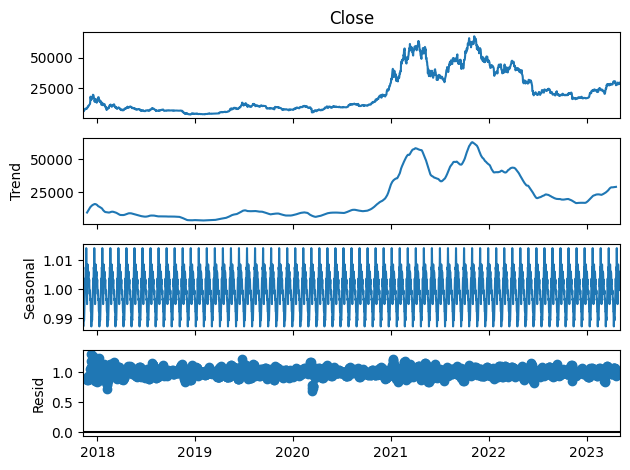

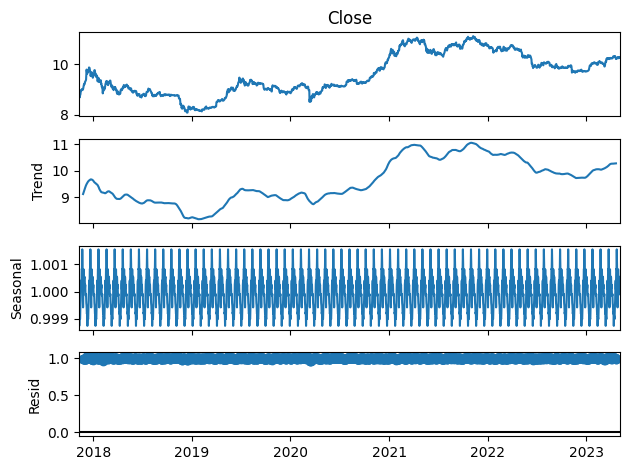

LB Statistic (Residuos): 3112.1807525194768
p-value (Residuos): 0.0


In [193]:
decompose_result = seasonal_decompose(close_prices, model='multiplicative', period=30)
decompose_result.plot()
plt.show()

decompose_result_log = seasonal_decompose(log_close_prices, model='multiplicative', period=30)
decompose_result_log.plot()
plt.show()

residuals = decompose_result.resid.dropna()
ljungbox_residuals = acorr_ljungbox(residuals, lags=[10])
print(f'LB Statistic (Residuos): {ljungbox_residuals["lb_stat"].values[0]}')
print(f'p-value (Residuos): {ljungbox_residuals["lb_pvalue"].values[0]}')

# Interpretación de la Descomposición de la Serie Temporal
* Gráfico de Descomposición
**Serie Original (Close):**

* La serie muestra el precio de cierre del BTC-USD desde 2018 hasta 2023.

* Se observan varios picos y valles a lo largo del tiempo, indicando períodos de alta volatilidad.

**Tendencia (Trend):**

* La componente de tendencia muestra la dirección general de los precios a lo largo del tiempo.
* Se observa una tendencia general al alza hasta 2021, seguida de un período de estabilización y luego una ligera disminución.

**Estacionalidad (Seasonal):**

* La componente estacional muestra patrones repetitivos a lo largo de un período específico.
* Se observa una estacionalidad clara con fluctuaciones regulares que parecen tener un período anual.

**Residuales (Resid):**

* Los residuales representan lo que queda de la serie original después de eliminar la tendencia y la estacionalidad.
* Idealmente, los residuales deberían parecerse a ruido blanco si la descomposición ha sido efectiva.

**Estadísticas**
* LB Statistic (Prueba de Ljung-Box) de los Residuales:

* LB Statistic: 3112.188725194768
* P-valor: 0.0
* La prueba de Ljung-Box evalúa si hay autocorrelaciones significativas en los residuales. Un p-valor de 0.0 indica que hay autocorrelaciones significativas, sugiriendo que los residuales no son completamente aleatorios.

**Conclusión**
* Tendencia y Estacionalidad:

* La serie de tiempo de BTC-USD tiene componentes claras de tendencia y estacionalidad. La tendencia muestra períodos de aumento y estabilización en los precios, mientras que la estacionalidad indica patrones repetitivos anuales.
**Residuales:**

* Los residuales no son completamente aleatorios, como lo indica el p-valor de la prueba de Ljung-Box. Esto sugiere que hay patrones adicionales en los datos que no han sido capturados completamente por la descomposición de tendencia y estacionalidad.

El siguiente código procesa los precios de cierre del Bitcoin diferenciándolos para estabilizar la serie y luego evalúa la autocorrelación con hasta 40 retrasos. Se utilizan el test de Dickey-Fuller aumentado (ADF) para verificar la estacionariedad y la prueba de Ljung-Box para evaluar la independencia de las autocorrelaciones en los datos diferenciados. Estos pasos son cruciales para asegurar que los datos están adecuadamente preparados para análisis y modelado predictivo más detallados.

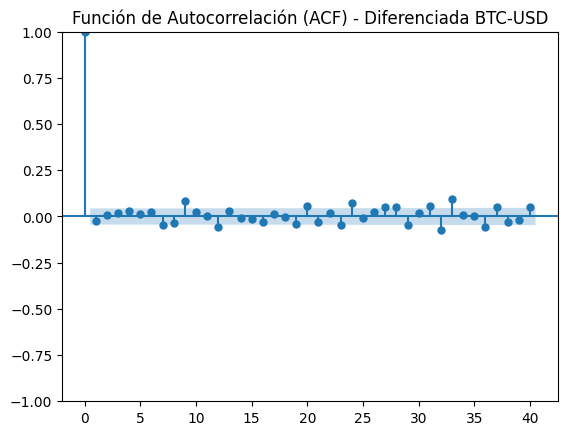

ADF Statistic (Diff): -7.81004019986262
p-value (Diff): 7.110003919558702e-12
LB Statistic (Diff): 27.583733262299987
p-value (Diff): 0.002103880217036545


In [194]:
diff_close_prices = close_prices.diff().dropna()

Autocorrelation(diff_close_prices, lags=40)
plt.title('Función de Autocorrelación (ACF) - Diferenciada BTC-USD')
plt.show()

adf_result_diff = A_DickeyFuller(diff_close_prices)
print(f'ADF Statistic (Diff): {adf_result_diff[0]}')
print(f'p-value (Diff): {adf_result_diff[1]}')

ljungbox_result_diff = acorr_ljungbox(diff_close_prices, lags=[10])
print(f'LB Statistic (Diff): {ljungbox_result_diff["lb_stat"].values[0]}')
print(f'p-value (Diff): {ljungbox_result_diff["lb_pvalue"].values[0]}')

# nterpretación de la Función de Autocorrelación (ACF) de la Serie Diferenciada BTC-USD* 
* Gráfico de ACF
**Eje Y (Autocorrelación):**

* Muestra los valores de la autocorrelación para diferentes rezagos (lags). Los valores van de -1 a 1.
* Valores positivos indican que las observaciones en ese rezago están positivamente correlacionadas.
* Valores negativos indican que las observaciones en ese rezago están negativamente correlacionadas.

**Eje X (Lags):**

* Muestra los diferentes rezagos, que en este caso llegan hasta 40.

**Sombreado Azul Claro (Intervalo de Confianza):**

* Muestra el intervalo de confianza alrededor de las autocorrelaciones. Si una barra de autocorrelación cae fuera de esta región, es significativamente diferente de cero.* 
* Generalmente, se utiliza un intervalo de confianza del 95%.

**Barras de Autocorrelación:**
* Las barras indican la autocorrelación en cada rezago.
* En este gráfico, las autocorrelaciones disminuyen rápidamente a cero, y la mayoría de las barras están dentro del intervalo de confianza, indicando que la serie diferenciada no tiene correlaciones significativas a largo plazo.

**Estadísticas**
* ADF Statistic (Prueba de Dickey-Fuller Aumentada):

* Estadístico ADF: -7.810484109852887
* P-valor: 7.110803975562122e-12
* La prueba ADF se utiliza para verificar la estacionariedad de la serie temporal. Un p-valor muy pequeño (menor a 0.05) sugiere que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, es decir, la serie es estacionaria.

**LB Statistic (Prueba de Ljung-Box):**

* LB Statistic: 27.53832998209927
* P-valor: 0.08210388201834565
* La prueba de Ljung-Box evalúa si hay autocorrelaciones significativas en una serie de tiempo. Un p-valor mayor a 0.05 sugiere que no hay autocorrelaciones significativas, es decir, los residuales son aleatorios. ta para ser utilizada en modelos predictivos que requieren estacionariedad.

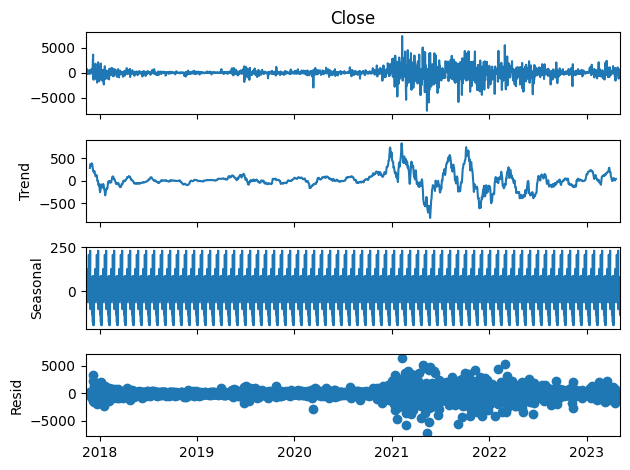

In [195]:
decompose_result_diff = seasonal_decompose(diff_close_prices, model='additive', period=30)
decompose_result_diff.plot()
plt.show()

# Interpretación de la Descomposición de la Serie Temporal Diferenciada
* Gráfico de Descomposición

**Serie Original Diferenciada (Close):**

* La serie muestra el precio de cierre del BTC-USD después de aplicar una diferenciación.

* La serie parece más estacionaria con fluctuaciones alrededor de cero, indicando que la diferenciación ha eliminado las tendencias a largo plazo.

**Tendencia (Trend):**

* La componente de tendencia muestra una dirección general en los precios diferenciados a lo largo del tiempo.

* La tendencia muestra menos fluctuaciones comparado con la serie original, sugiriendo que las variaciones a largo plazo han sido eliminadas.

**Estacionalidad (Seasonal):**

* La componente estacional muestra patrones repetitivos en la serie diferenciada.
* La estacionalidad es clara y regular, con fluctuaciones periódicas que probablemente corresponden a ciclos específicos en los datos, como tendencias semanales o mensuales.

**Residuales (Resid):**

* Los residuales representan lo que queda de la serie diferenciada después de eliminar la tendencia y la estacionalidad.
* Los residuales parecen ser ruido blanco, es decir, no muestran patrones claros, lo que es un buen indicio de que la descomposición ha capturado correctamente las principales características de la serie.